In [1]:
from preamble import *
%matplotlib inline

## 5. Model Evaluation and Improvement

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
print("X.shape:", X.shape)
print("y.shape:", y.shape)

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)

# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

X.shape: (100, 2)
y.shape: (100,)
Test set score: 0.88


### 5.1 Cross-Validation
- 교차 검증
  - 데이터를 여러 번 반복해서 나누어 모델 학습
- K-Fold cross-vailidation
  - Fold: 원본 데이터에 대한 부분 집합
  - K로는 5나 10을 주로 사용
    - 첫번째 모델은 첫번째 fold를 테스트 데이터로 사용하고 나머지를 훈련 데이터로 사용
    - 두번째 모델은 두번째 fold를 테스트 데이터로 사용하고 나머지를 훈련 데이터로 사용
    - 세번째 모델은...

2.1.2


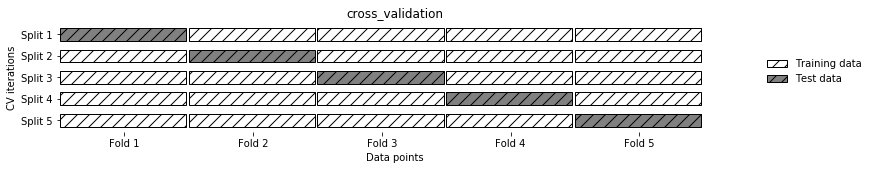

In [3]:
import matplotlib
print(matplotlib.__version__)

mglearn.plots.plot_cross_validation()

#### 5.1.1 Cross-Validation in scikit-learn
- scikit-learn의 교차 검증
  - model_selection.cross_val_score(estimator, X, y=None, cv=None) 함수 사용
    - estimator
      - estimator object implementing ‘fit’
      - The object to use to fit the data.
    - X
      - The data to fit.
    - y
      - The target variable to try to predict in the case of supervised learning.
    - cv
      - K-Fold의 K값 (기본 값: 3)

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
print("iris.data.shape:", iris.data.shape)
print("iris.target.shape:", iris.target.shape)

logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

iris.data.shape: (150, 4)
iris.target.shape: (150,)
Cross-validation scores: [0.961 0.922 0.958]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.    0.967 0.933 0.9   1.   ]


- 교차 검증의 정확도: 각 교차 검증 정확도의 평균값 사용

In [6]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


### 5.1.2 Benefits of Cross-Validation
- 기존 train_test_split 방법만 사용하는 경우
  - 확보한 원본 데이터 중 일부의 데이터는 훈련 데이터로 활용하지 않으면서 모델을 구성함.
- cross_val_score 함수를 사용하는 경우
  - 데이터를 고르게 사용하여 fit을 하고 score를 구하기 때문에 모델의 성능을 좀 더 정확히 측정할 수 있음
  - 새로은 테스트 데이터의 예측 정확도에 대하여 최악과 최선의 경우를 짐작할 수 있음 
  - [주의] **cross_val_score가 직접 모델을 구성하는 방법은 아님!**
    - 즉, <u>이 함수를 호출하면 내부적으로 K번 모델을 구성하지만, 그러한 모델들은 평가의 목적으로만 활용됨.</u>

### 5.1.3 Stratified K-Fold cross-validation and other strategies
- 계층별 K-Fold 교차 검증
  - 각 Fold안의 클래스 비율이 전체 원본 데이터셋에 있는 클래스 비율과 동일하도록 맞춤
  - 즉, 원본 데이터셋에서 클래스 A가 90%, 클래스 B가 10% 비율이라면, 계층별 K-Fold 교차 검증에서 각 K개의 Fold안에는 클래스 A가 90%, 클래스 B가 10% 비율이 됨.
- scikit-learn의 cross_val_score 기본 설정
  - 분류모델: StratifiedKFold를 사용하여 기본적으로 계층별 K-Fold 교차 검증 수행
  - 회귀모델: 단순한 KFold를 사용하여 계층별이 아닌 기본 K-Fold 교차 검증 수행
    - 대신 회귀모델에서는 KFold를 사용할 때 shuffle 매개변수를 True로 지정하여 폴드를 나누기 전에 무작위로 데이터를 섞는 작업 추천

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


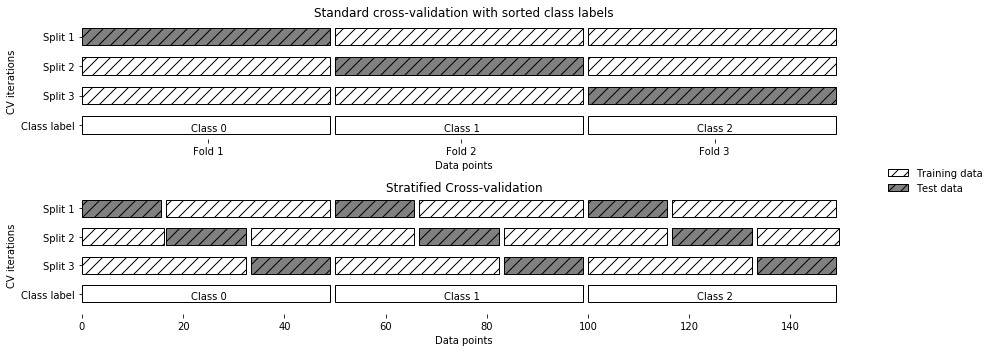

In [8]:
mglearn.plots.plot_stratified_cross_validation()

### More control over cross-validation
- 기본적으로...
  - 분류: StratifiedKFold가 사용됨
  - 회귀: KFold가 사용됨
- 하지만, 때때로 분류에 KFold가 사용되어야 할 필요도 있음
  - 다른 사람이 이미 수행한 사항을 재현해야 할 때
  - StratifiedKFold가 아닌 KFold를 생성하여 cross_val_score()의 cv 인자에 할당

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5) #교차 검증 분할기의 역할 수행

In [10]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.    0.933 0.433 0.967 0.433]


- 이런 경우 3-Fold를 사용하면 데이터 타겟 레이블 분포 특성상 성능이 매우 나쁠 수 있음

In [11]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


- 해결책
  - KFold를 만들 때 shuffle=True를 통해 데이터를 임의로 섞음.
  - random_state=0을 주면 추후 그대로 재현이 가능

In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


#### Leave-one-out cross-validation (LOOCV)
- Fold 하나에 하나의 샘플이 들어 있는 Stratified k-Fold 교차 검증
  - 즉, 각각의 반복에서 테스트 데이터에 하나의 샘플만 존재
  - 데이터셋이 클 때 시간이 매우 오래 걸림
  - 작은 데이터셋에 대해서는 일반적인 상황에 대한 거의 확실한 score 값을 얻을 수 있음.

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


#### Shuffle-split cross-validation
- 임의 분할 교차 검증
  - model_selection.SuffleSplit(n_splits=10, test_size='default') or model_selection.StratifiedSuffleSplit(n_splits=10, test_size='default')
    - n_splits: 10
      - 분할의 개수
    - test_size 만큼의 테스트 셋트를 만들도록 분할
      - test_size의 기본값: 0.1
  - 보통 test_size 값만 설정하며, 추가적으로 train_size 도 설정 가능
    - 이런 경우 전체 데이터 집합 중 일부만 훈련과 테스트에 사용할 수 있음
    - 대규모 데이터에 유용
  - test_size, train_size
    - 정수: 데이터 포인트의 개수
    - 실수: 데이터 포인트 비율<br/><br/>

- 아래 그림 예제
  - 전체 데이터 셈플 개수: 10
  - train_size = 5
  - test_size = 2
  - n_splits = 4

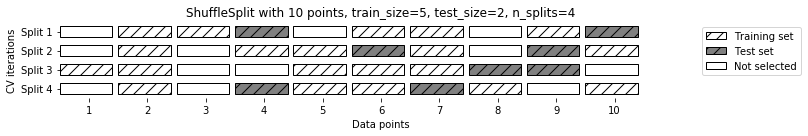

In [14]:
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(n_splits=10, test_size=.5, train_size=.5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores:
[0.947 0.853 0.92  0.907 0.947 0.893 0.96  0.933 0.92  0.893]
Mean accuracy: 0.92


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = StratifiedShuffleSplit(n_splits=10, test_size=.5, train_size=.5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores:
[0.973 0.933 0.92  0.933 0.973 0.947 0.96  0.973 0.947 0.933]
Mean accuracy: 0.95


##### Cross-validation with groups
- 임의의 그룹에 속한 데이터 전체를 훈련 집합 또는 테스트 집합에 넣을 때 사용
- 테스트 데이터가 때때로 완전히 새로운 데이터가 되어야 할 필요 있음
- model_selection.GroupKFold
  - 그룹핑을 통하여 훈련 데이터 셋트와 테스트 데이터 셋트를 완벽히 분리하기 위해 사용
  - group 배열
    - 각 데이터 포인트 별로 그룹 index 지정 필요
    - 배열 내에 index 지정을 통해 훈련 데이터와 테스트 데이터를 랜덤하게 구성할 때 분리되지 말아야 할 그룹을 지정
    - 타깃 레이블과 혼동하면 안됨
- 더 나은 방법
  - 이 방법대신 model_selection.train_test_split을 통해 처음 부터 테스트 데이터를 미리 분리하는 것이 더 좋음.

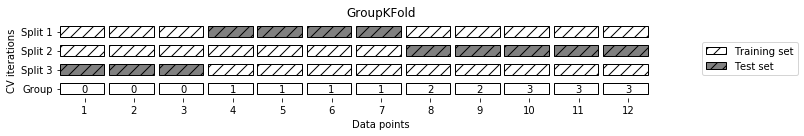

In [17]:
mglearn.plots.plot_group_kfold()

In [18]:
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)

# assume the first three samples belong to the same group,
# then the next four, etc
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores:
[0.75  0.8   0.667]
Mean accuracy: 0.74


### 5.2 Grid Search
- 모델 매개변수 튜닝을 통한 일반화 성능 개선 
- 가장 널리 사용되는 방법은 Grid Search (그리드 탐색)
  - 관심있는 매개변수들을 대상으로 모든 조합을 시도함.

#### 5.2.1 Simple Grid-Search
- SVC 모델에서 가장 중요한 매개변수는 gamma, C
- 그리드 탐색 범위 설정 예
  - gamma: [0.001, 0.01, 0.1, 1, 10, 100]
  - C: [0.001, 0.01, 0.1, 1, 10, 100]
  - 총 6x6=36개의 조합에 대하여 반복적으로 새로운 모델 생성 및 평가
  - 가장 좋은 성능을 보여주는 gamma와 C의 조합을 찾음

<table>
    <tr>
        <td>&nbsp;</td>
        <td>C=0.001</td>
        <td>C=0.01</td>
        <td>C=0.1</td>
        <td>C=1</td>
        <td>C=10</td>
        <td>C=100</td>
    </tr>
    <tr>
        <td>gamma=0.001</td>
        <td>SVC(C=0.001, gamma=0.001)</td>
        <td>SVC(C=0.01, gamma=0.001)</td>
        <td>SVC(C=0.1, gamma=0.001)</td>
        <td>SVC(C=1, gamma=0.001)</td>
        <td>SVC(C=10, gamma=0.001)</td>
        <td>SVC(C=100, gamma=0.001)</td>
    </tr>
    <tr>
        <td>gamma=0.01</td>
        <td>SVC(C=0.001, gamma=0.01)</td>
        <td>SVC(C=0.01, gamma=0.01)</td>
        <td>SVC(C=0.1, gamma=0.01)</td>
        <td>SVC(C=1, gamma=0.01)</td>
        <td>SVC(C=10, gamma=0.01)</td>
        <td>SVC(C=100, gamma=0.01)</td>
    </tr>
    <tr>
        <td>gamma=0.1</td>
        <td>SVC(C=0.001, gamma=0.1)</td>
        <td>SVC(C=0.01, gamma=0.1)</td>
        <td>SVC(C=0.1, gamma=0.1)</td>
        <td>SVC(C=1, gamma=0.1)</td>
        <td>SVC(C=10, gamma=0.1)</td>
        <td>SVC(C=100, gamma=0.1)</td>
    </tr>
    <tr>
        <td>gamma=1</td>
        <td>SVC(C=0.001, gamma=1)</td>
        <td>SVC(C=0.01, gamma=1)</td>
        <td>SVC(C=0.1, gamma=1)</td>
        <td>SVC(C=1, gamma=1)</td>
        <td>SVC(C=10, gamma=1)</td>
        <td>SVC(C=100, gamma=1)</td>
    </tr>
    <tr>
        <td>gamma=10</td>
        <td>SVC(C=0.001, gamma=10)</td>
        <td>SVC(C=0.01, gamma=10)</td>
        <td>SVC(C=0.1, gamma=10)</td>
        <td>SVC(C=1, gamma=10)</td>
        <td>SVC(C=10, gamma=10)</td>
        <td>SVC(C=100, gamma=10)</td>
    </tr>
    <tr>
        <td>gamma=100</td>
        <td>SVC(C=0.001, gamma=100)</td>
        <td>SVC(C=0.01, gamma=100)</td>
        <td>SVC(C=0.1, gamma=100)</td>
        <td>SVC(C=1, gamma=100)</td>
        <td>SVC(C=10, gamma=100)</td>
        <td>SVC(C=100, gamma=100)</td>
    </tr>    
</table>

In [19]:
# naive grid search implementation
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


- 위 0.97의 정확도는 전혀 새로운 데이터에 대한 성능으로 이어지지 않을 수 있다.
- 즉, 위 예제에서 사용한 테스트 데이터는 모델 구성시에 사용을 해버렸기 때문에 이 모델이 얼마나 좋은지 평가하는 데 더 이상 사용할 수 없다.

#### 5.2.2 The danger of overfitting the parameters and the validation set
- 검증 데이터 세트 (Valudation Set) 필요
  - 모델 파라미터 튜닝 용도
- 모델을 구성할 때 훈련 데이터 세트와 검증 데이터 세트를 활용

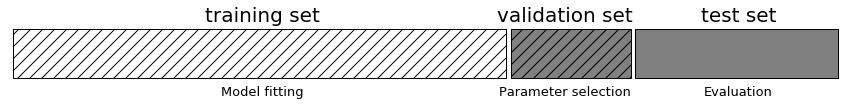

In [20]:
mglearn.plots.plot_threefold_split()

In [21]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}, size of validation set: {},size of test set: {}\n".format(
    X_train.shape[0], 
    X_valid.shape[0], 
    X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)

#[NOTE] 훈련 데이터와 검증 데이터를 합쳐서 다시 모델을 구성함
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84, size of validation set: 28,size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


- 위 예제를 통하여 전혀 새로운 테스트 데이터에 대하여, 생성 모델은 92%의 정확도로 분류한다고 볼 수 있음

#### 5.2.3 Grid-search with cross-validation
- 그리드 탐색에서도 교차 검증 필요
  - 위 두 예제에서 최고의 성능을 보여주는 파라미터가 변경된 점을 주의
  - cross_val_score 사용

In [22]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}, size of validation set: {},size of test set: {}\n".format(
    X_train.shape[0], 
    X_valid.shape[0], 
    X_test.shape[0]))

# reference: manual_grid_search_cv
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)

#[NOTE] 훈련 데이터와 검증 데이터를 합쳐서 다시 모델을 구성함
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84, size of validation set: 28,size of test set: 38

Best score on validation set: 0.97
Best parameters:  {'C': 100, 'gamma': 0.01}
Test set score with best parameters: 0.97


- 위 예에서는 반복적인 모델 생성 작업이 6 \* 6 \* 5 = 180번 이루어짐
  - 즉, 시간이 많이 소요됨에 주의

- 아래 그림은 교차 검증에 5-fold 사용
- 매개변수 그리드는 일부만 표시
- 교차 검증 5번의 평균이 가장 높은 매개변수를 빨간 동그라미로 표시

/Users/yhhan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yhhan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yhhan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yhhan/anaconda3/lib/python

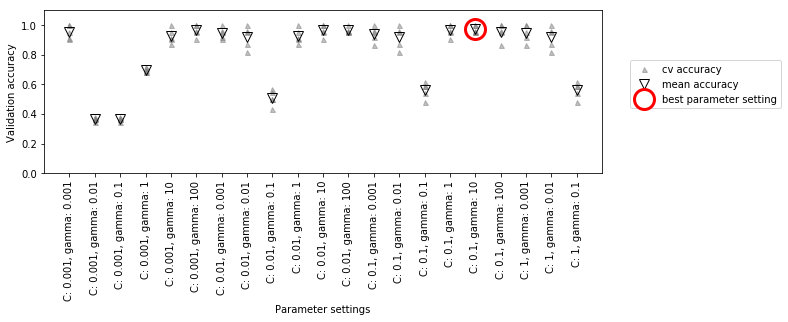

In [23]:
mglearn.plots.plot_cross_val_selection()

- 그리드 서치와 교차 검증을 사용한 매개 변수 선택과 모델 평가의 전체 작업 흐름

![process](./images/process.jpg)

- **model_selection.GridSearchCV**
  - <u>**교차 검증을 사용하는 그리드 탐색을 통한 모델 파라미터 검색 기능 제공 객체**</u>
  - 기본적으로 사용하는 교차 검증 분류기
    - 분류에는 StratifiedKFold 사용함
    - 회귀에는 KFold 사용함
  - fit을 수행한 이후에는 가장 최적의 파라미터로 만들어진 모델을 구성하고 있음.
- 다른 estimator (or 모델)를 사용하여 만들어지는 estimator를 메타 추정기(meta-estimator)라고 함.
  - GridSearchCV는 가장 널리 사용되는 메타 추정기
  - scikit-learn에서는 MetaEstimatorMixin 클래스를 상속한 모델을 메타 추정기라고 부름
  - 메타 추정기 예
    - GridSearchCV
    - RandomForest
    - GradientBoosting
    - RFE
    - ...

- 우선 모델에 들어갈 각 매개변수 값을 사전(Dict)타입으로 구성
  - 문자열 매개변수 이름을 모델(예:SVC)에 설정된 매개변수와 동일하게 맞춤  

In [24]:
param_grid = {    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


- GridSearchCV 생성
  - model_selection.GridSearchCV(estimator, param_grid, n_jobs=1, cv=None, verbose=0, return_train_score='True')
    - estimator
    - param_grid
    - n_jobs
      - Number of jobs to run in parallel
      - default: 1
      - -1 --> Using All threads
    - cv
      - None, to use the default 3-fold cross validation
      - integer, to specify the number of folds in a (Stratified)KFold.
        - fold의 개수를 cv=5와 같이 설정
      - An object to be used as a cross-validation generator.
      - An iterable yielding train, test splits.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

estimator = SVC()
grid_search = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid, 
    n_jobs = -1, 
    cv = 5, 
    return_train_score = True
)

- 훈련 데이터와 테스트 데이터 분리

In [26]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

- 훈련 데이터만 GridSearchCV 객체에 넣어 fit을 함
  - 이 때 훈련 데이터중 일부는 내부적으로 검증 데이터 (Validation Data)로 사용됨
- GridSearchCV는 생성시 모델을 내장하므로 fit, predict, score 등의 함수를 제공
  - 모델에 따라서 predict_proba, decision_function을 제공하기도 함

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

- 모델 구성시 사용하지 않은 완전히 새로운 데이터인 X_test와 y_test를 사용하여 모델 평가

In [28]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [29]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


- 위 두 예에서 grid_search.score() 메소드와 grid_search.best\_score\_ 속성은 매우 큰 차이
  - grid_search.score() 메소드
    - 새로운 데이터인 테스트 데이터 셋을 통한 모델 평가 점수
  - grid_search.best\_score\_ 속성
    - 훈련 데이터에 대하여 수행한 교차 검증에서의 최고 점수

In [30]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### [NOTE] 전형적인 교차 검증 그리드 서치를 통한 모델 구성 및 테스트 집합 성능 평가 코드

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

estimator = SVC()

param_grid = {    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid, 
    n_jobs = -1, 
    cv = 5, 
    return_train_score = True
)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


#### Analyzing the result of cross-validation
- grid_search.cv\_results\_
  - 그리드 탐색에 대한 교차 검증 결과 정보가 상세히 들어 있는 속성

In [32]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
pd.options.display.float_format = '{:,.7f}'.format

print(results.columns)
# show the first 5 rows
# display(results.head(5))
display(results)

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_gamma', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'split4_test_score', 'split4_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,...,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0075518,0.0016598,0.3660714,0.3660787,...,0.0046701,0.0006180,0.0113708,0.0028518
1,0.0026103,0.0005504,0.3660714,0.3660787,...,0.0014704,0.0001624,0.0113708,0.0028518
2,0.0011451,0.0006258,0.3660714,0.3660787,...,0.0003283,0.0004259,0.0113708,0.0028518
3,0.0016550,0.0005676,0.3660714,0.3660787,...,0.0012802,0.0002186,0.0113708,0.0028518
4,0.0011442,0.0004800,0.3660714,0.3660787,...,0.0001604,0.0000464,0.0113708,0.0028518
5,0.0011803,0.0005733,0.3660714,0.3660787,...,0.0001982,0.0001357,0.0113708,0.0028518
6,0.0011685,0.0005098,0.3660714,0.3660787,...,0.0001261,0.0000483,0.0113708,0.0028518
7,0.0010259,0.0011171,0.3660714,0.3660787,...,0.0000981,0.0013694,0.0113708,0.0028518
8,0.0014330,0.0004835,0.3660714,0.3660787,...,0.0004770,0.0000184,0.0113708,0.0028518
9,0.0016891,0.0004840,0.3660714,0.3660787,...,0.0008849,0.0000352,0.0113708,0.0028518


In [33]:
results2 = results[['rank_test_score', 'params', 'mean_test_score', 'std_test_score', 
                    'mean_train_score', 'std_train_score']]
results2 = results2.sort_values('rank_test_score')
display(results2)

,rank_test_score,params,mean_test_score,std_test_score,mean_train_score,std_train_score
31,1,"{'C': 100, 'gamma': 0.01}",0.9732143,0.0223995,0.9843684,0.0054851
20,2,"{'C': 1, 'gamma': 0.1}",0.9642857,0.0340769,0.9776501,0.0100842
30,2,"{'C': 100, 'gamma': 0.001}",0.9642857,0.0340769,0.9776757,0.0070319
26,2,"{'C': 10, 'gamma': 0.1}",0.9642857,0.0177687,0.9865662,0.0083555
25,2,"{'C': 10, 'gamma': 0.01}",0.9642857,0.0340769,0.9776757,0.0070319
32,6,"{'C': 100, 'gamma': 0.1}",0.9553571,0.0495662,0.9887884,0.0099945
15,6,"{'C': 0.1, 'gamma': 1}",0.9553571,0.0401043,0.9598457,0.0113043
33,8,"{'C': 100, 'gamma': 1}",0.9464286,0.0519227,1.0000000,0.0000000
21,8,"{'C': 1, 'gamma': 1}",0.9464286,0.0324799,0.9843928,0.0088664
27,10,"{'C': 10, 'gamma': 1}",0.9375000,0.0452528,0.9865906,0.0083624


- heatmap을 사용한 mean_test_score를 각 매개변수별로 시각화

[0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.6964285714285714, 0.9196428571428571, 0.9553571428571429, 0.36607142857142855, 0.36607142857142855, 0.6964285714285714, 0.9285714285714286, 0.9642857142857143, 0.9464285714285714, 0.9196428571428571, 0.5089285714285714, 0.9285714285714286, 0.9642857142857143, 0.9642857142857143, 0.9375, 0.9196428571428571, 0.5625, 0.9642857142857143, 0.9732142857142857, 0.9553571428571429, 0.9464285714285714, 0.9196428571428571, 0.5625]

(36,)


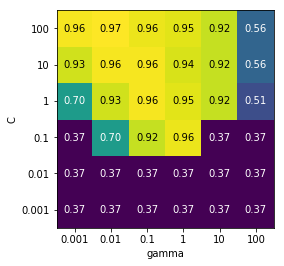

In [34]:
print([x for x in results.mean_test_score])
print()

print(results.mean_test_score.shape)

scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(
    scores, 
    xlabel='gamma', 
    xticklabels=param_grid['gamma'],
    ylabel='C', 
    yticklabels=param_grid['C'], 
    cmap="viridis"
)

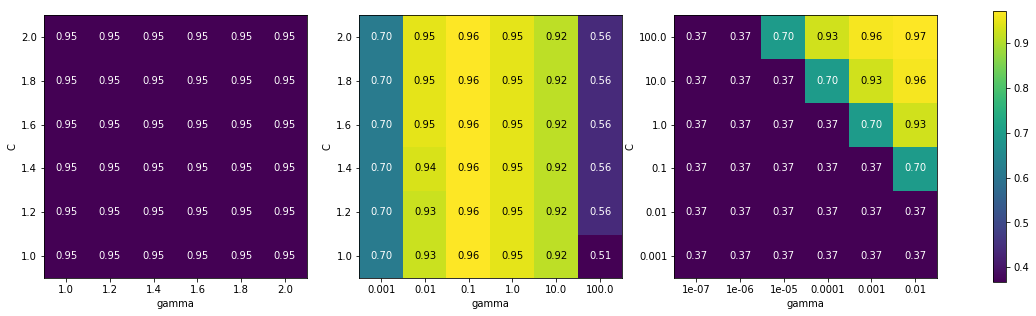

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

param_grid_linear  = {'C': np.linspace(1, 2, 6),  'gamma':  np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),  'gamma':  np.logspace(-3, 2, 6)}
param_grid_range   = {'C': np.logspace(-3, 2, 6), 'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

- 첫번째 그래프
  - 매개변수 C와 gamma의 스케일과 범위를 잘못 택하였음을 나타냄
  - 처음에는 더 넓은 범위의 C와 gamma 스케일 및 범위를 택하고, 이후 정확도에 따라 매개변수를 바꾸어 선택할 필요있음<br/><br/>

- 두번째 그래프
  - 세로 띠 형태를 보이므로 gamma 매개변수만 정확도에 영향을 주고 있음을 나타냄
  - 두 가지 케이스
    - C 매개변수는 전혀 중요한 역할을 못할 수 있음
    - C 매개변수의 스케일과 범위를 잘못 선택하였을 수 있음<br/><br/>
    
- 세번째 그래프
  - 그래프 왼쪽 아래에서는 변화가 없음
  - 다시 매개변수 스케일과 범위를 선택하는 과정에서 현재 선택한 것 보다 더 높은 gamma 및 C 값을 선택할 필요성 있음

#### Grid search with asymmetric parameters
- SVC
  - kernel='rbf' 일 때
    - C 매개변수, gamma 매개변수 동시 사용
  - kernel='linear' 일 때
    - C 매개변수만 사용
    - gamma 매개변수는 사용하지 않음

In [36]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [37]:
grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [38]:
results = pd.DataFrame(grid_search.cv_results_)

results2 = results[['rank_test_score', 'params', 'mean_test_score', 'std_test_score', 
                    'mean_train_score', 'std_train_score']]
results2 = results2.sort_values('rank_test_score')
display(results2)

,rank_test_score,params,mean_test_score,std_test_score,mean_train_score,std_train_score
39,1,"{'C': 1, 'kernel': 'linear'}",0.9732143,0.0223995,0.9843684,0.0054851
31,1,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.9732143,0.0223995,0.9843684,0.0054851
20,3,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.9642857,0.0340769,0.9776501,0.0100842
30,3,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.9642857,0.0340769,0.9776757,0.0070319
26,3,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.9642857,0.0177687,0.9865662,0.0083555
25,3,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.9642857,0.0340769,0.9776757,0.0070319
40,3,"{'C': 10, 'kernel': 'linear'}",0.9642857,0.0338387,0.9888134,0.0070280
41,3,"{'C': 100, 'kernel': 'linear'}",0.9642857,0.0338387,0.9932579,0.0055055
32,9,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.9553571,0.0495662,0.9887884,0.0099945
15,9,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.9553571,0.0401043,0.9598457,0.0113043


#### Using different cross-validation strategies with grid-search
- GridSearchCV의 인자인 cv에 스스로 정의한 다음과 같은 교차 검증 분할기 제공
  - KFold(n_splits=5)   
  - StratifiedKFold(n_splits=5)
  - ShuffleSplit(n_splits=5)
  - StratifiedShuffleSplit(n_splits=5)
- n_splits=1을 사용하는 경우
  - 훈련 데이터 세트와 검증 데이터 세트로의 분리를 한번 만 수행
  - 데이터셋이 매우 크거나 모델 구축 시간이 오래 걸릴 때 사용하는 전략

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = StratifiedShuffleSplit(test_size=.8, n_splits=1)
grid_search = GridSearchCV(SVC(), param_grid, cv=shuffle_split, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.98


In [40]:
results = pd.DataFrame(grid_search.cv_results_)

results2 = results[['rank_test_score', 'params', 'mean_test_score', 'std_test_score', 
                    'mean_train_score', 'std_train_score']]
results2 = results2.sort_values('rank_test_score')
display(results2)

,rank_test_score,params,mean_test_score,std_test_score,mean_train_score,std_train_score
39,1,"{'C': 1, 'kernel': 'linear'}",0.9777778,0.0000000,0.9545455,0.0000000
32,1,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.9777778,0.0000000,1.0000000,0.0000000
31,1,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.9777778,0.0000000,0.9545455,0.0000000
26,1,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.9777778,0.0000000,0.9545455,0.0000000
40,1,"{'C': 10, 'kernel': 'linear'}",0.9777778,0.0000000,1.0000000,0.0000000
41,6,"{'C': 100, 'kernel': 'linear'}",0.9666667,0.0000000,1.0000000,0.0000000
33,7,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.9555556,0.0000000,1.0000000,0.0000000
27,7,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.9555556,0.0000000,1.0000000,0.0000000
21,7,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.9555556,0.0000000,0.9545455,0.0000000
30,10,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.9333333,0.0000000,0.9545455,0.0000000


#### Nested cross-validation
- 지금까지 살펴본 코드들의 단점
  - 처음에 원본 데이터들을 훈련 데이터와 테스트 데이터로 **한번만** 나누고 있음.
  - 원본 데이터를 훈련 데이터와 테스트 데이터로 나누는 시점도 교차 검증화 시킬 수 있음 --> **중첩 교차 검증**
- **중첩 교차 검증**
  - outer_scores = []
  - 1st Loop: 원본 데이터를 훈련(Training) 데이터와 테스트(Test) 데이터로 분리 및 순회
    - best_params = {}
    - best_score = -np.inf
    - 2nd Loop: 매개변수 그리드를 순회
      - 3rd Loop: 훈련 데이터를 다시 훈련(Training) 데이터와 검증(Validation) 데이터로 분리
      - 3rd Loop의 결과 모델을 평가하여 best_params 및 best_score 조정
    - best_params와 함께 모델 구성하여 평가결과를 outer_scores에 저장

![process](./images/nestedkfold.jpg)

- 위 중첩 교차 검증과정을 corss_val_score 및 GridSearchCV 조합으로 간단하게 완성

In [41]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
scores = cross_val_score(grid_search, iris.data, iris.target, n_jobs=-1, cv=5)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.967 1.    0.967 0.967 1.   ]
Mean cross-validation score:  0.9800000000000001


- 위 코드 설명
  - 매개 변수 조합: 6 \* 6 = 36
  - 바깥 루프: 5개 분할
  - 안쪽 루프: 5개 분할
  - 모델 생성 횟수: 36 \* 5 \* 5 = 900

In [42]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    outer_best_params = []
    
    # for each split of the data in the outer cross-validation
    # (split method returns indices of training and test part)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf

        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []

            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)

                # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters

        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])

        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
        outer_best_params.append(best_params)
    return np.array(outer_scores), outer_best_params

In [43]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores, params = nested_cv(
    iris.data, 
    iris.target, 
    StratifiedKFold(5), 
    StratifiedKFold(5), 
    SVC,
    ParameterGrid(param_grid)
)

print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: ", scores.mean())
print("best params: {}".format(params))

Cross-validation scores: [0.967 1.    0.967 0.967 1.   ]
Mean cross-validation score:  0.9800000000000001
best params: [{'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.01}]


#### Parallelizing cross-validation and grid search
- 다중 CPU 코어 or 다중 GPU 코어 사용
- 사용가능한 프레임워크
  - ipyparallel
    - https://ipyparallel.readthedocs.io
  - spark-sklearn
    - https://github.com/databricks/spark-sklearn

### 5.3. Evaluation Metrics and Scoring
- 기존의 Simple한 모델 평가 지표 (score)
  - 분류 문제: 정확도 (Accuracy)
  - 회귀 문제: $R^2$
- 하지만, 어플리케이션에 따라 위의 평가 지표가 적합하지 않을 수 있음. 

#### 5.3.1 Keep the End Goal in Mind (최종 목표를 기억하라)
- 어플리케이션의 고차원 목표인 비지니스 지표를 우선적으로 고려해야 함
  - 비지니스 지표 예
    - 교통사고율 낮춤
    - 입원환자 수 낮춤
    - 웹사이트 사용자 유입률 증대
    - 소비자 소비률 증대
  - 분석 모델 개발 초기 단계에 매개변수를 조정하기 위해 시험 삼아 모델을 실제 운영 시스템에 곧바로 적용하기란 위험부담이 크다.
- 비지니스 임팩트 (Business Impact)
  - 어떤 머신러닝 어플리케이션에서 특정 알고리즘을 선택하여 나타난 결과
- 훈련 모델에 대한 비지니스 임팩트를 정확하게 예상할 수 있는 다양한 평가지표 도입 필요
  - 이진 분류의 평가 지표
  - 다중 분류의 평가 지표
  - 회귀의 평가 지표

#### 5.3.2 Metrics for Binary Classification
- 두 가지 분류 클래스
  - 양성 클래스 (주 관심 클래스) --> Positive Class
  - 음성 클래스 --> Negative Class <br/><br/>
  
- 모델 적용 결과에 대한 분류
  - True Positive (참 양성, TP)
    - 모델에서 실제 양성 클래스를 정확하게 양성으로 평가한 것들
  - False Negative (거짓 음성, FN)
    - 모델에서 실제 양성 클래스를 잘못하여 음성으로 평가한 것들    
  - True Negative (참 음성, TN)
    - 모델에서 실제 음성 클래스를 정확하게 음성으로 평가한 것들          
  - False Positive (거짓 양성, FP)
    - 모델에서 실제 음성 클래스를 잘못하여 양성으로 평가한 것들 

- 참고: https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative

<img src="images/eval.png" width="75%"/>

##### Kinds of errors
- 암의 조기 발견 어플리케이션 
  - 테스트가 음성(-)이면 건강함을 뜻함
    - 음성 클래스(Negative Class)
  - 테스트가 양성(+)이면 암 진단이 되었음을 뜻함
    - 양성 클래스(Positive Class)
  - 잘못된 분류 케이스
    - Case 1. 건강한 사람을 양성으로 잘못 분류한 경우
      - 이 환자에게 비용 손실과 불편함을 초래함
      - 즉, 잘못된 양성 예측
      - 분류: ***거짓 양성 (False Positive)***
    - Case 2. 암에 걸린 사람을 음성으로 잘못 분류한 경우
      - 제대로 된 검사나 치료를 제때에 못하게 하는 치명적인 오류
      - 즉, 잘못된 음성 예측
      - 분류: ***거짓 음성 (False Negative)***
      
- 대부분의 경우 ***거짓 음성***이 ***거짓 양성***보다 더 치명적
- 거짓 음성 분류와 거짓 양성 분류 중 하나가 다른 것 보다 훨씬 많을 때 이 상황은 매우 중요한 상황으로 인식해야 함.

##### Imbalanced datasets
- 불균형 데이터셋(Imbalanced datasets)
  - 예) 인터넷 광고 클릭 데이터에서 원본 데이터 샘플의 99%가 '클릭 아님'이고 1%만이 '클릭'인 데이터셋
  - 현실에서 불균형 데이터는 매우 많음
  - 위 예에서 머신러닝 모델을 만들지 않고서도 무조건 '클릭 아님'으로 예측하면 그 정확도가 99%가 됨.
  
- 따라서, '정확도'만으로 모델의 성능을 판별하는 것은 지양해야 함.

- digits 데이터셋에서 Target 데이터를 숫자 9이면 True, 그렇지 않으면 False로 변환하여 1:9의 불균형 데이터셋 생성

In [44]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test[:10])
print()
print(len(np.where(y_test == True)[0]))
print(len(np.where(y_test == False)[0]))

(1347, 64)
(1347,)
(450, 64)
(450,)
[False False False False False False False  True False False]

47
403


- 정답 '9임'의 총 개수: 47 --> ***양성 클래스***
- 정답 '9가 아님'의 총 개수: 403 --> ***음성 클래스***

- DummyClassifier
  - strategy='stratified'
    - 기본값
    - 레이블 비율에 맞추어서 예측
  - strategy='most_frequent'    
    - 가장 많은 레이블로 항상 예측

- DummyRegressor
  - strategy='mean'
  - strategy='median'  

- 아무런 학습을 하지 않고도 90% 정확도가 나올 수 있음

In [45]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


- 정상적인 학습을 하더라도 92% 정확도가 나옴 --> 위의 결과와 그리 차이가 없음

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


- 레이블 비율에 맞추어서 예측을 하는 Dummy 모델도 꽤 성능이 좋음.

In [47]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_dummy)))
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

Unique predicted labels: [False  True]
dummy score: 0.83
logreg score: 0.98


- Dummy 분류기 조차 매우 좋은 예측 정확도를 산출하는 점에 유의
  - 현실세계에서 많이 발생할 수 있는 불균형 데이터셋(Imbalanced datasets)과 함께 **오로지 정확도만으로 모델의 성능을 지표화하는 것은 올바른 방법이 아님**

##### Confusion matrices
- **오차 행렬(Confusion Matrix)**
  - 이진 분류 평가 결과를 나타낼 때 가장 널리 사용되는 방식
  - 행(Row)
    - 정답 클래스
  - 열(Colume)
    - 예측 클래스

In [48]:
from sklearn.metrics import confusion_matrix

print(len(np.where(y_test == True)[0]))
print(len(np.where(y_test == False)[0]))

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

47
403
Confusion matrix:
[[401   2]
 [  8  39]]


- [***음성*** 정답] - 정답 '9가 아님'의 총 개수: 403
  - [***음성*** 예측] - 예측 '9가 아님'의 총 개수: 401 --> ***True Negative (TN)***
  - [***양성*** 예측] - 예측 '9임'의 총 개수: 2 --> ***False Positive (FP, 거짓 양성)*** --> 잘못된 양성 분류
  
- [***양성*** 정답] - 정답 '9임'의 총 개수: 47
  - [***음성*** 예측] - 예측 '9가 아님'의 총 개수: 8 --> ***False Negative (FN, 거짓 음성)*** --> 잘못된 음성 분류
  - [***양성*** 예측] - 예측 '9임'의 총 개수: 39 --> ***True Positive (TP)***



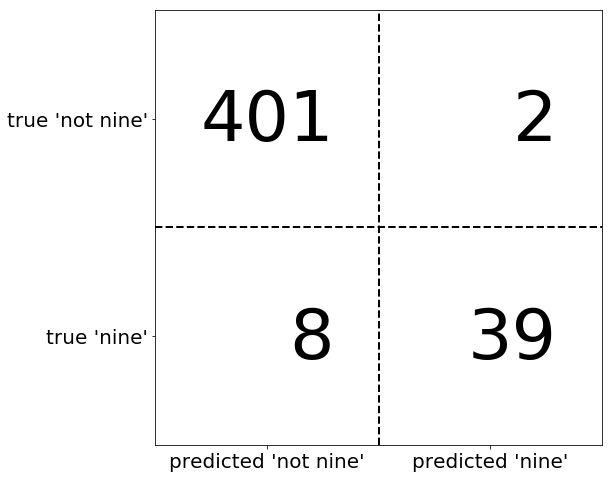

In [49]:
mglearn.plots.plot_confusion_matrix_illustration()

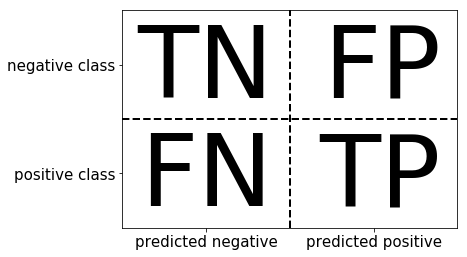

In [50]:
mglearn.plots.plot_binary_confusion_matrix()

In [51]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))

print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))

print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))

print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[362  41]
 [ 42   5]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


###### Accuracy (정확도)
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

- 전체 샘플 수 중에서 정확히 예측한 것(TP 와 TN)의 비율
- scikit-learn 에서 score 함수가 반환하는 값

##### Precision (정밀도)
\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

- 양성(Positive)로 예측한 것(TP와 FP)들 중 진짜 양성인 것(TP)의 비율
- **거짓 양성(FP)의 수를 줄이는 것을 목표**로 할 때 사용하는 지표
  - 신약의 효과 검증 등 임상 시험에 많이 사용
- **거짓 음성(FN)의 수가 늘어나는 것에 대해 정밀도 수치는 영향받지 않음**
- 양성 예측도 (PPV)라고도 불리움

##### Recall (재현율)
\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

- 진짜 양성인 것(FN과 TP)들 중 올바르게 양성으로 예측된 것(TP)의 비율 
- **거짓 음성(FN)의 수를 줄이는 것**을 목표로 할 때 사용하는 지표
  - 암 진단
- **거짓 양성(FP)의 수가 늘어나는 것에 대해 재현율 수치는 영향받지 않음***
  - 즉, 건강한 사람이 일부 암 진단을 받더라도 암에 걸린 사람을 빠짐없이 찾는 것이 더 중요
- 민감도(Sensitivity), 적중률(Hit Rate), 진짜 양성 비율 (TPR)라고도 불리움

##### f-score (f-점수)
- $P$: Precision
- $R$: Recall
\begin{equation}
\text{F} = \frac{1}{\displaystyle \alpha \frac{1}{P} + (1-\alpha) \frac{1}{R}}
\end{equation}
- 정밀도와 재현율은 상충 관계
- 모든 샘플을 양성 클래스로만 예측한 경우
  - FP와 TP만 존재
  - 재현율: 1, 정밀도는 상대적으로 낮아짐
- 하나의 샘플만 (올바르게) 양성 클래스로 예측하고 나머지 샘플을 음성 클래스로만 예측한 경우
  - TN과 FN만 존재
  - 정밀도: 1, 재현율은 상대적으로 낮아짐
- f-score
  - 정밀도와 재현율의 조화 평균
  - 정밀도와 재현울을 동시에 고려한 수치이므로 불균한 이진 분류문제의 정확도(Accuracy)보다 더 나은 지표 
  - f1-score
    - f-score 공식에서 $\alpha=0.5$
\begin{equation}
\text{f1-score} = \frac{1}{\displaystyle 0.5 \frac{1}{P} + 0.5 \frac{1}{R}} = 2 \cdot \frac{P \cdot R}{P + R}
\end{equation}
- f-measure (f-측정)이라고도 함

#### [Note] 주가 변동 이진 분류 예측
- 특성 데이터
  - 일봉의 종가 기반
  - N개 종목의 과거 M일치의 종가 데이터
  - 1개 샘플의 특성 데이터 크기 N * M
  - 하루씩 Shift하면서 새로운 샘플 생성
- 타겟 데이터
  - 특정 종목의 M+1일의 종가 데이터
  - 직전 M일자 종가보다 M+1일자 종가가 올랐다면 1, 그렇지 않으면 0
- 두 가지 분류 클래스
  - 1: 양성 (Positive) 클래스
  - 0: 음성 (Negative) 클래스 
- 성능 평가 측정
  - Accuracy는 당연히 높아야 함.
  - Precision과 Recall은 상충관계이므로 둘 중 하나를 택하여 더 집중적으로 높여야 한다면 어떤것을 높여야 하나?
    - Precision 관점
      - 거짓 양성(FP)을 줄이는 것을 목적
      - 즉, 주가가 올라간다고 예측을 했는 데, 실제로는 하락을 한 경우를 줄이고자 함.
      - **재화의 상실**
    - Recall 관점
      - 거짓 음성(FN)을 줄이는 것을 목적
      - 즉, 주가가 하락한다고 예측을 했는 데, 실제로는 상승을 한 경우를 줄이고자 함.
      - **기회의 상실**

In [52]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.11
f1 score tree: 0.55
f1 score logistic regression: 0.89


/Users/yhhan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


- f1 score most frequent 모델의 f1 점수는 TP가 0이므로, 재현율과 정밀도가 모두 0
  - 그러므로 f1 점수 공식에서 분모가 0
  - 위 Warning 메시지의 원인 
- f1-점수로 비교해본 가장 좋은 모델
  - Logistic Regression

- sklearn.metrics.classification_report
  - 각 클래스마다 교대로 양성임을 가정
  - 상위 두 개의 출력 라인
    - 해당 클래스가 양성일 때 다음 4개의 값을 출력
      - 정밀도(precision)
      - 재현율(recall)
      - f1-점수(f1-score)
      - 해당 클래스에 실제로 속한 샘플 개수(support) 
          - 정답 데이터인 y_test에 대한 각 클래스별 샘플 개수

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/Users/yhhan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      0.90      0.90       403
       nine       0.11      0.11      0.11        47

avg / total       0.81      0.82      0.81       450



In [55]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



##### Taking uncertainty into account
- 모델 예측의 확신도를 가늠하기 위한 함수
  - decicion_function
    - 임계값: 0
    - decision_fuction의 임계값이 0일 때 클래스 분류  
      - decision_function() <= 0 --> 클래스 0 (음성 클래스)로 분류
      - decision_function() > 0 --> 클래스 1 (양성 클래스)로 분류
  - predict_proba
    - 임계값: 0.5

In [56]:
from mglearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=(400, 50),  # 음성 클래스: 400개, 양성 클래스: 50개
    centers=2, 
    cluster_std=[7.0, 2], 
    random_state=22
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

svc = SVC(gamma=.05).fit(X_train, y_train)

(337, 2)
(337,)

(113, 2)
(113,)


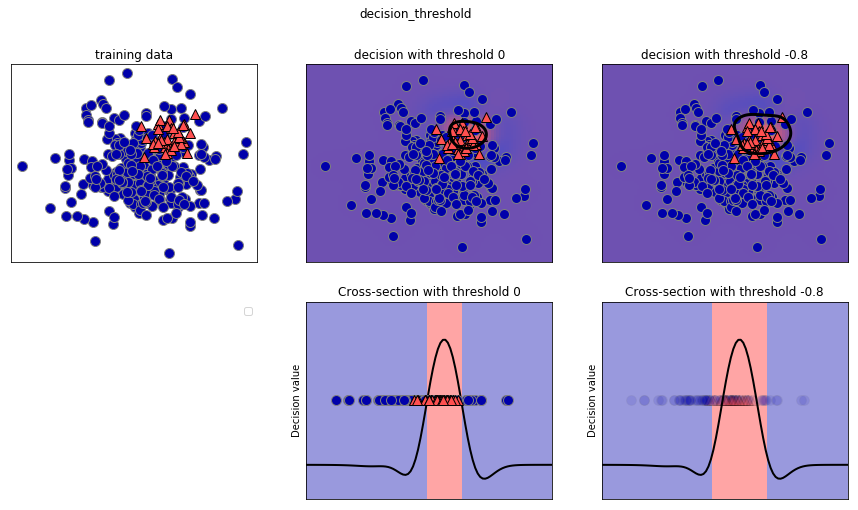

In [57]:
mglearn.plots.plot_decision_threshold()

- 위 상위 두 개의 그림에서 검은색 동그라미
  - decision_fuction의 임계점이 0일 때와 -0.8일 때의 경계 위치
  - 이 동그라미 내부는 양성 클래스(decision_function() > 0)로 분류, 바깥쪽은 음성 클래스로 분류

In [58]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



- 양성 클래스 1에 대해 정밀도(0.35)가 매우 낮음, 재현율(0.67)도 낮음.
  - 음성 클래스 0에 대한 샘플 수가 많아서 생긴 결과임 --> 데이터 불균형

- 이제 클래스 1의 재현율(recall)을 높이는 것이 중요하다고 가정.
  - 즉, 거짓 양성(FP)의 수가 늘어나도 중요하지 않음.
  - 진짜 양성(TP)을 늘리고 거짓 음성(FN)을 줄이려고 함.
  - decision_function의 임계값을 낮추면 클래스 1로 분류되는 경우가 더 많아짐

In [59]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(y_pred_lower_threshold.shape)

(113,)


In [60]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



- 클래스 1의 재현율이 1.00 --> 즉, 거짓 음성은 전혀 없음
  - 반면에 정밀도는 다소 낮아짐
- decision_function 값의 임계점을 고르는 일반적인 방법을 제시하기는 어려움

##### Precision-Recall curves (정밀도-재현율 곡선)

- 분류 임계값 조정 작업
  - 정밀도와 재현율의 상충 관계 조정하는 일과 동일
  - 임계값 조정은 비지니스 목표에 의존적
    - 비지니스 목표: 어떤 클래스에 대해 목표로 하는 재현율 또는 정밀도 값을 얻어냄
    - 예를 들어 양성 클래스에 대하여 **90% 재현율 산출**이 비지니스 목표가 될 수 있음

- ***운영 포인트 (Operating Point)*** 지정
  - 예: **90% 재현율 산출**
  - 분류 모델이 목표로 하는 성능지표를 지정하는 작업
  - 비지니스 목표와 연관이 깊음
  - 많은 경우 운영 포인트를 정확하게 지정하는 것은 어려움
    - 이런 경우 임계값을 폭넓게 변경해 가며 정밀도와 재현율을 산출하며 그 장단점을 살펴보는 작업 필요
    - 이를 위해 ***정밀도-재현율 곡선***을 사용
    - sklearn.metrics.precision_recall_curve
      - 가능한 모든 임계값에 대한 정밀도와 재현율 값을 리스트로 반환

In [61]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

print("precision: {}\n".format(precision))
print("recall: {}\n".format(recall))
print("thresholds: {}\n".format(thresholds))

close_zero = np.argmin(np.abs(thresholds))
print(close_zero)
print(thresholds[close_zero])

precision: [0.321 0.296 0.308 0.32  0.333 0.348 0.364 0.381 0.4   0.368 0.333 0.353
 0.375 0.4   0.429 0.385 0.417 0.455 0.4   0.444 0.5   0.571 0.667 0.6
 0.5   0.667 0.5   1.    1.   ]

recall: [1.    0.889 0.889 0.889 0.889 0.889 0.889 0.889 0.889 0.778 0.667 0.667
 0.667 0.667 0.667 0.556 0.556 0.556 0.444 0.444 0.444 0.444 0.444 0.333
 0.222 0.222 0.111 0.111 0.   ]

thresholds: [-0.751 -0.587 -0.487 -0.444 -0.404 -0.29  -0.242 -0.193 -0.179 -0.166
 -0.16   0.086  0.146  0.192  0.37   0.52   0.523  0.532  0.632  0.744
  0.872  0.88   0.884  0.978  1.     1.07   1.084  1.251]

11
0.08620483947417501


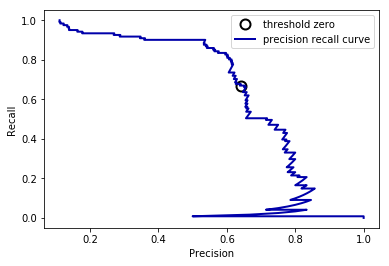

In [62]:
# create a similar dataset as before, but with more samples
# to get a smoother curve
X, y = make_blobs(
    n_samples=(4000, 500), 
    centers=2, 
    cluster_std=[7.0, 2],
    random_state=22
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(
    precision[close_zero],
    recall[close_zero],
    'o',
    markersize=10,
    label="threshold zero",
    fillstyle="none",
    c='k',
    mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

- 위그림의 파란색 곡선은 decision_function의 가능한 모든 임계값에 대응되는 Precision과 Recall 값을 나타냄
- 검은색 원은 decision_function의 기본 임계값인 0의 지점을 나타냄
  - 이 지점은 predict 메소드를 호출할 때 사용되는 임계 지점 값
- 위 정밀도-재현율 곡선은 오른쪽 위로 갈 수록 좋은 분류기
  - 오른쪽 위 --> 정밀도와 재현율이 모두 높은 곳
- 위 그래프에서 알 수 있는 것
  - 0.9 정도의 높은 Recall을 유지하면서도 0.5 정도의 Precision을 얻을 수 있음
  - 0.5보다 더 높은 Precision을 얻어내기 위해서는 Recall을 많이 손해 봐야 함

- RandomForestClassifier는 decision_function은 제공하지 않고 predict_proba만 제공
  - rf.predict_proba(X_test)[:, 1]
    - 양성 클래스(클래스 1)의 확신 정도값을 가지고 오는 코드
    - 기본 임계값: 0.5

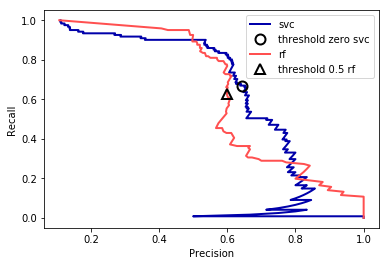

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(
    precision[close_zero], 
    recall[close_zero], 
    'o', 
    markersize=10,
    label="threshold zero svc", 
    fillstyle="none", 
    c='k', 
    mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(
    precision_rf[close_default_rf], 
    recall_rf[close_default_rf], 
    '^', 
    markersize=10,
    label="threshold 0.5 rf", 
    fillstyle="none", 
    c='k',
    mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

- 높은 Precision 또는 높은 Recall을 얻기 위해서는 RandomForestClassifier가 더 좋은 모델
- Precision 과 Recall 두 개의 값을 적절히 동시에 높은 값을 얻기 위해서는 SVC가 더 좋은 모델

- f1-score만으로는 이런 세세한 부분을 비교할 수 없음
  - f1-score는 정밀도-재현율 곡선의 한 지점인 기본 임계값에 대한 점수임

In [64]:
from sklearn.metrics import f1_score

print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


- 어느 모델이 좋은지 보다 정확하게 비교하려면... 
  - 특정 임계값이나 운영 포인트에 국한하지 않고 전체 곡선에 대한 정보를 요약해야 함
- ***Average Precision (평균 정밀도)***
  - 정밀도-재현율 곡선의 아랫부분 면적을 계산한 값
  - 항상 0(가장 나쁨)에서 1(가장 좋음)사이의 값을 지님
  - sklearn.metrics.average_precision_score

In [65]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


- 평균 정밀도 측면에서 RandomForestClassifier와 SVC가 큰 차이 없음

##### Receiver Operating Characteristics (ROC) and AUC
- 진짜 양성 비율 (TPR): 전체 양성 샘플(TP와 FN)중에서 진짜 양성(TP)로 올바로 분류된 비율 = 재현율
\begin{equation}
\text{TPR} = Recall = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
<br/>
<br/>
- 거짓 양성 비율 (FPR): 전체 음성 샘플(FP와 TN) 중에서 거짓 양성(FP)로 잘못 분류된 비율 
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}
<br/>
<br/>
- TPR과 FPR의 해석
  - TPR과 FPR은 서로 반비례적인 관계에 있다. 암환자를 진단할 때, 성급한 의사는 아주 조금의 징후만 보여도 암인 것 같다고 할 것이다. 이 경우 TPR은 1에 가까워질 것이다. 그러나 FPR은 반대로 매우 낮아져버린다. (정상인 사람도 다 암이라고 하니까)

  - 반대로 돌팔이 의사라서 암환자를 알아내지 못한다면, 모든 환자에 대해 암이 아니라고 할 것이다. 이 경우 TPR은 매우 낮아져 0에 가까워 질 것이다. 그러나 반대로 FPR은 급격히 높아져 1에 가까워질 것이다.(암환자라는 진단 자체를 안하므로, 암환자라고 잘못 진단 하는 경우가 없음)
  - 출처: http://newsight.tistory.com/53 [New Sight]
<br/>
<br/>

- ROC 곡선
  - ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
  - '수신기 운영 특성 (Receiver Operating Characteristics)'이라는 이름은 신호 탐지 이론에서 비롯
  - 이름 그 자체의 의미는 무시하고 'TPR-FPR 곡선'으로 이해하는 것이 좋음

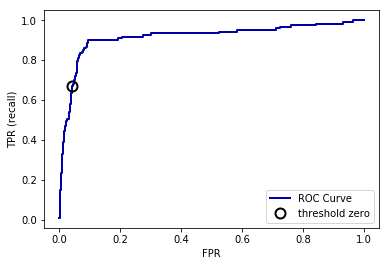

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

- ROC 곡선 해석
  - ROC 곡선은 왼쪽 상단에 가까울 수록 이상적임.
    - 즉, FPR은 낮게 유지하면서 TPR(재현율)은 높은 뷴류기가 좋음.  
  - 위 그림에서 기본 임계값 0에 대한 FPR과 TPR값보다는 FPR을 조금 더 늘려주면(0.1 정도) TPR을 상당히 높일 수 있음(0.9 정도)
    - 이러한 FPR=0.1 & TPR=0.9을 산출할 수 있는 임계값이 적절한 **운영 포인트**가 될 수 있음

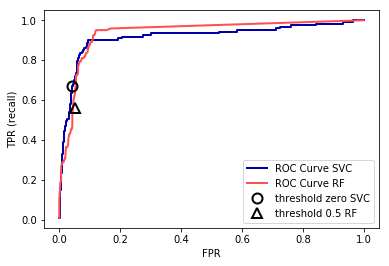

In [67]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

- 두 개의 ROC 곡선 해석
  - RandomForest 모델이 SVC 보다 좀 더 왼쪽 상단으로 ROC 곡선이 위치하는 듯 함
  - 어떤 ROC 곡선이 더 좋은지 알아보기 ROC 곡선아래의 면적을 하나의 값으로 요약할 수 있음
    - AUC (Area Under the (ROC) Curve)
      - 0(최악) ~ 1(최선)
    - 수집한 데이터가 불균현한 데이터 집합이라면 정확도보다 AUC가 더 의미있는 지표
    - sklearn.metrics.roc_auc_score

In [68]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


- AUC 측면에서 RandomForest 모델이 SVC 보다 좀 더 좋다고 볼 수 있음

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


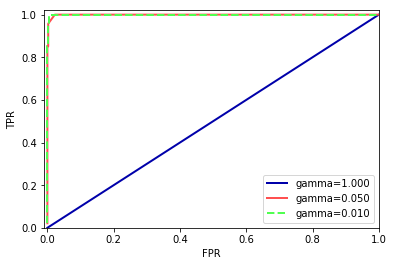

In [69]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))

    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

#### Multi-class classification

In [70]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


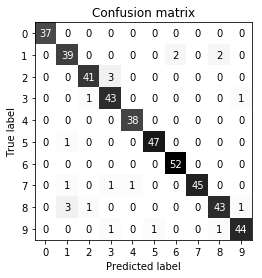

In [71]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")

plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [72]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [73]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))

print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


#### Regression metrics

### Using evaluation metrics in model selection

In [74]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.9 0.9 0.9]
Explicit accuracy scoring: [0.9 0.9 0.9]
AUC scoring: [0.994 0.99  0.996]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000


In [76]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


### Summary and Outlook